Importing libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Import Dataset

In [33]:
df = pd.read_csv('./data/Food_insecurity_economic_family_type.csv')
df.head()

,REF_DATE,GEO,DGUID,Economic family type,Household food security status,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2018,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,16.8,B,NaN,NaN,1
1,2019,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,15.9,B,NaN,NaN,1
2,2020,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,15.7,B,NaN,NaN,1
3,2021,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,18.4,A,NaN,NaN,1
4,2022,Canada,2021A000011124,All persons,Food insecure,Percentage of persons,Percent,239,units,0,v1529611273,1.1.6.2,22.9,A,NaN,NaN,1


Drop unwanted columns

In [34]:
cols_to_drop = [
    'DGUID', 'VECTOR', 'COORDINATE', 'STATUS', 'SYMBOL',
    'TERMINATED', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID'
]
df.drop(columns=[c for c in cols_to_drop if c in df.columns], inplace=True)

Rename columns

In [35]:
rename_map = {
    'REF_DATE': 'Year',
    'GEO': 'Region',
    'Economic family type': 'FamilyType',
    'Household food security status': 'FoodSecurityStatus',
    'Statistics': 'StatisticType',
    'UOM': 'Unit',
    'VALUE': 'Value',
    'DECIMALS': 'Decimals'
}
df.rename(columns=rename_map, inplace=True)

In [36]:
df.head()

,Year,Region,FamilyType,FoodSecurityStatus,StatisticType,Unit,Value,Decimals
0,2018,Canada,All persons,Food insecure,Percentage of persons,Percent,16.8,1
1,2019,Canada,All persons,Food insecure,Percentage of persons,Percent,15.9,1
2,2020,Canada,All persons,Food insecure,Percentage of persons,Percent,15.7,1
3,2021,Canada,All persons,Food insecure,Percentage of persons,Percent,18.4,1
4,2022,Canada,All persons,Food insecure,Percentage of persons,Percent,22.9,1


Convert “Value” column to a numerical type

In [37]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])

Convert other columns into Strings and remove extra spaces

In [38]:
for col in ['Year', 'Region', 'FamilyType', 'FoodSecurityStatus']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

Convert year into numerical type

In [39]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

Create array for future years to predict

In [40]:
future_years = np.arange(2024, 2029).reshape(-1, 1)

Group dataset by family type and food security status

In [41]:
categories = df.groupby(['FamilyType', 'FoodSecurityStatus'])

Train and predict per category

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


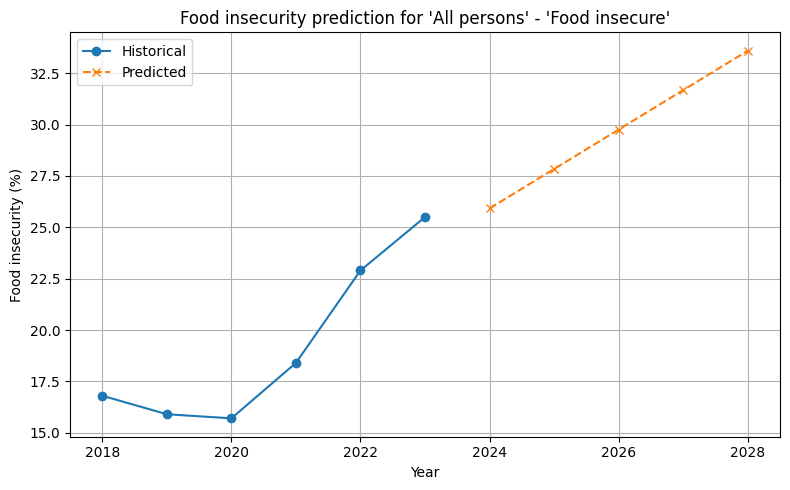

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


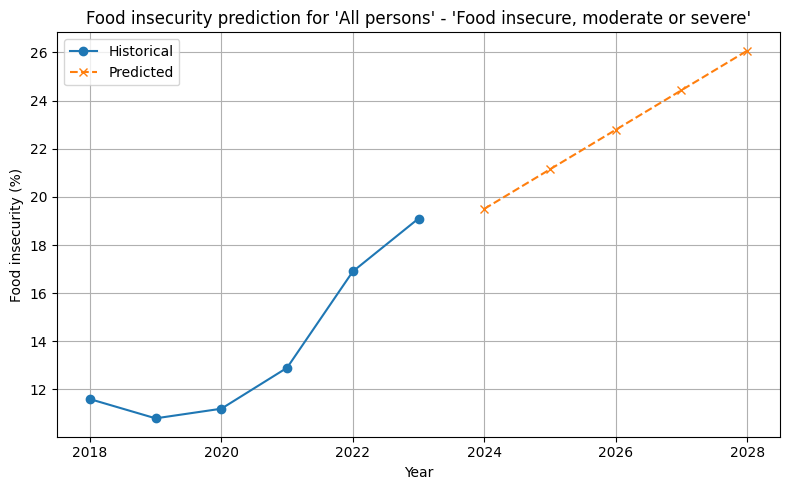

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


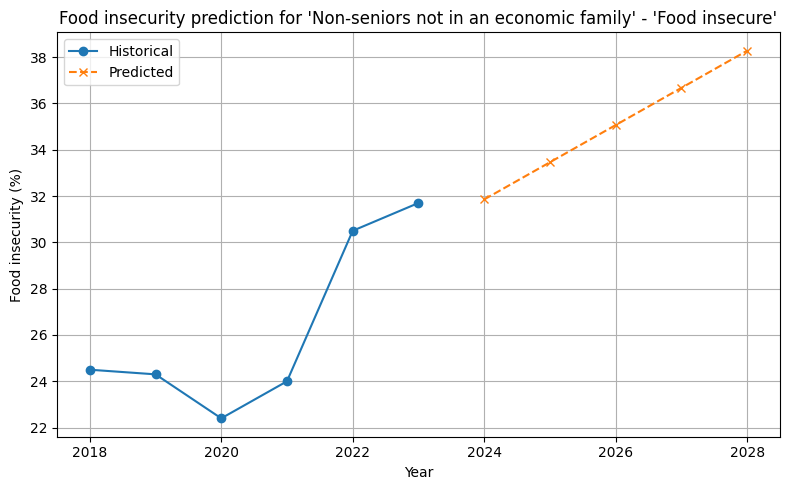

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


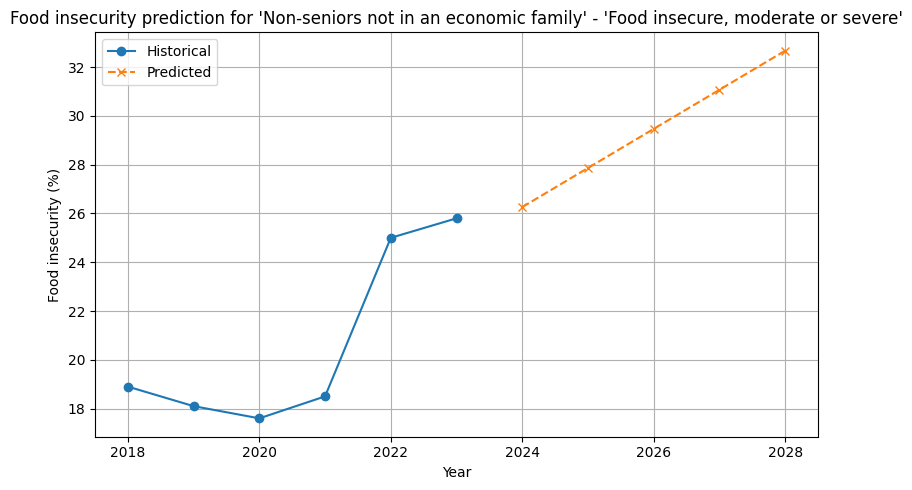

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


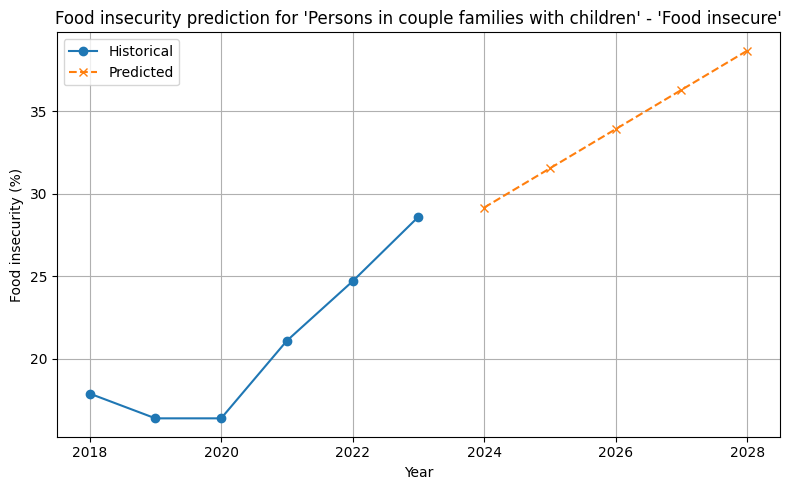

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


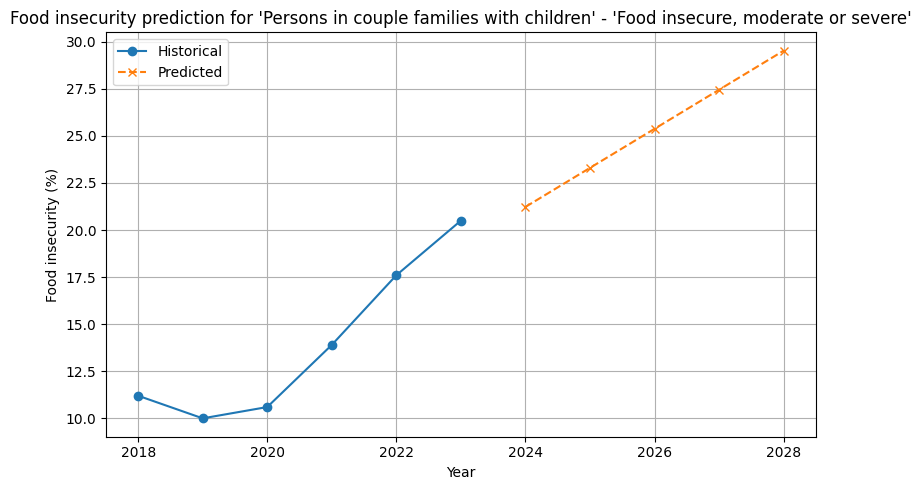

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


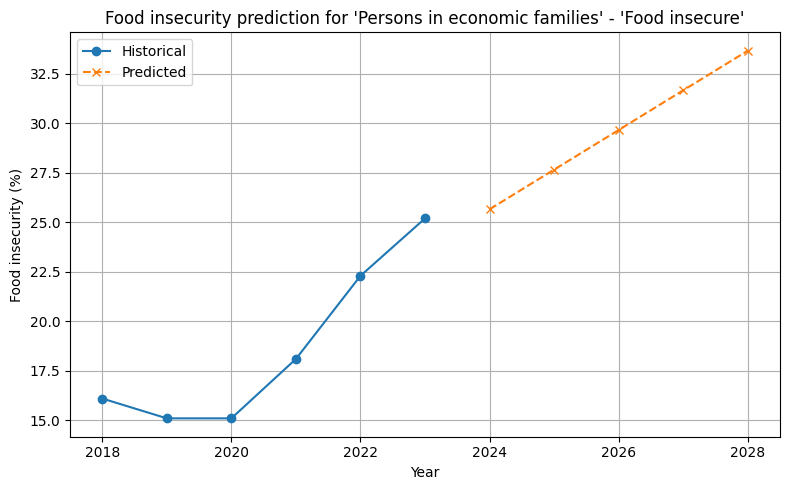

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


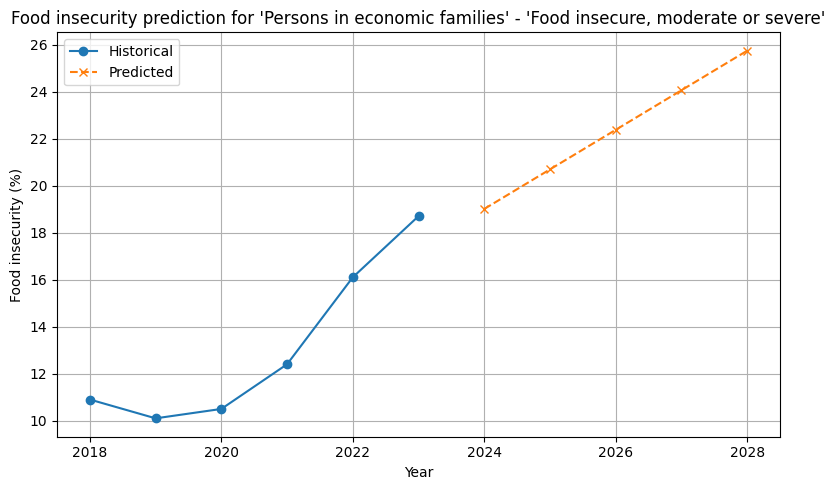

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


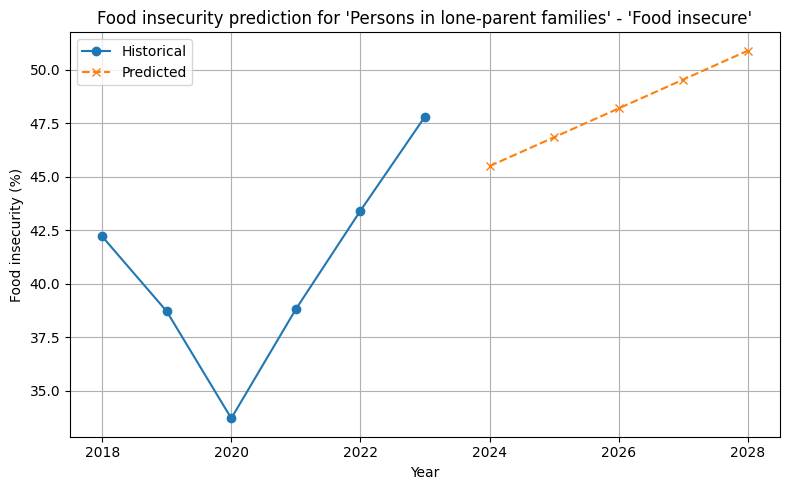

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


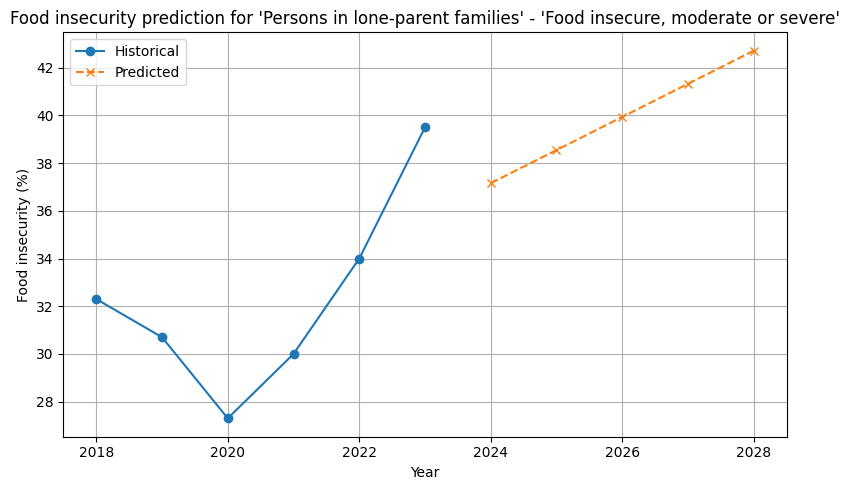

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


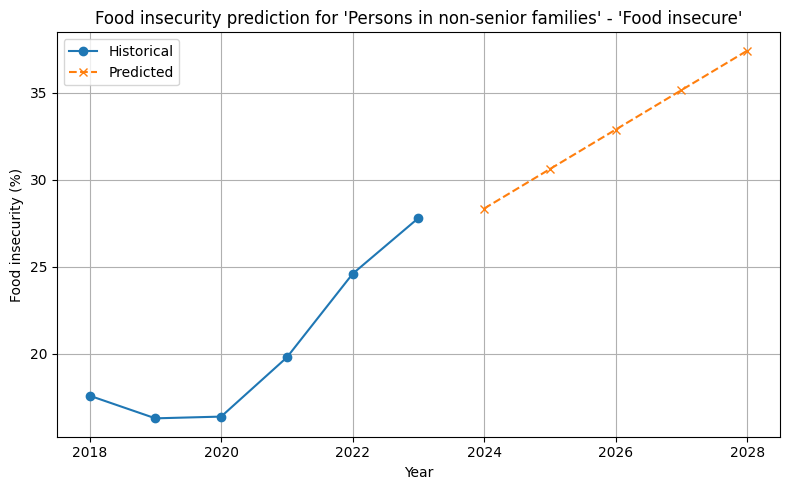

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


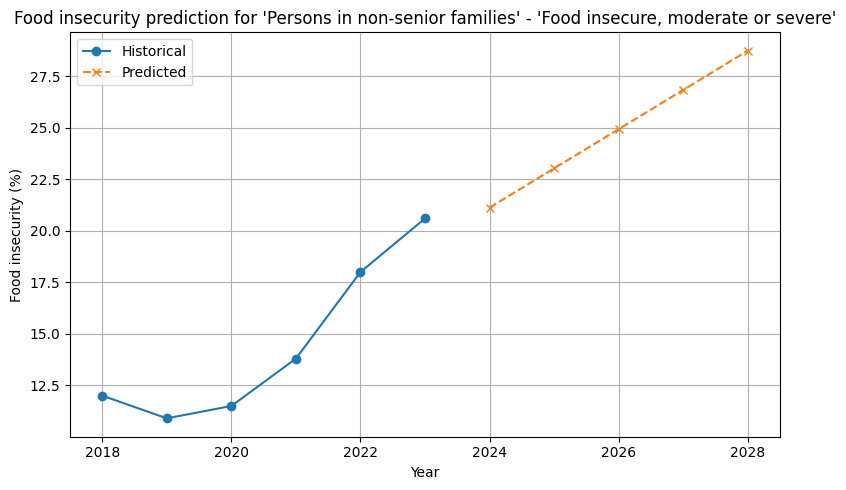

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


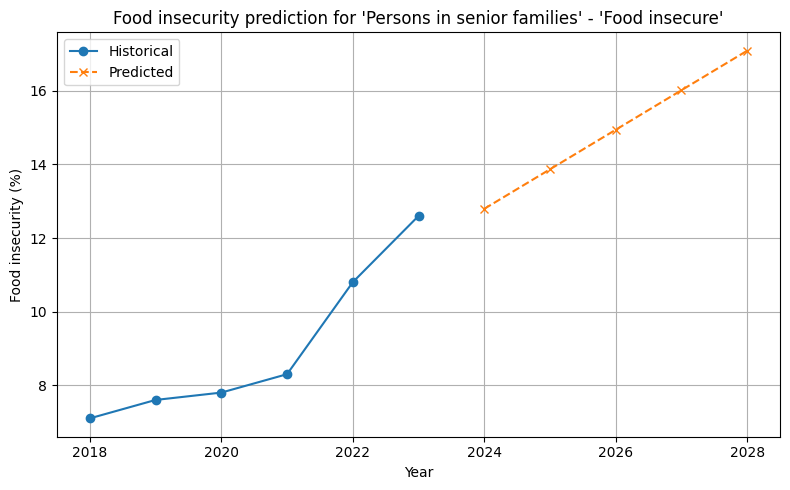

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


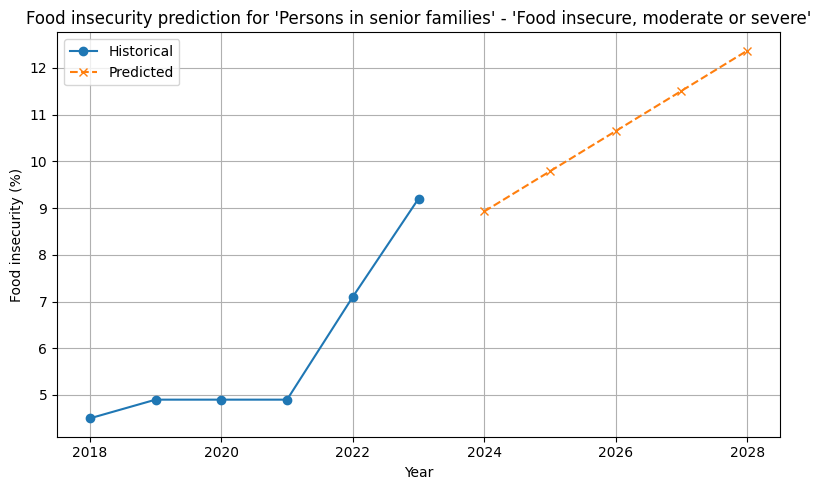

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


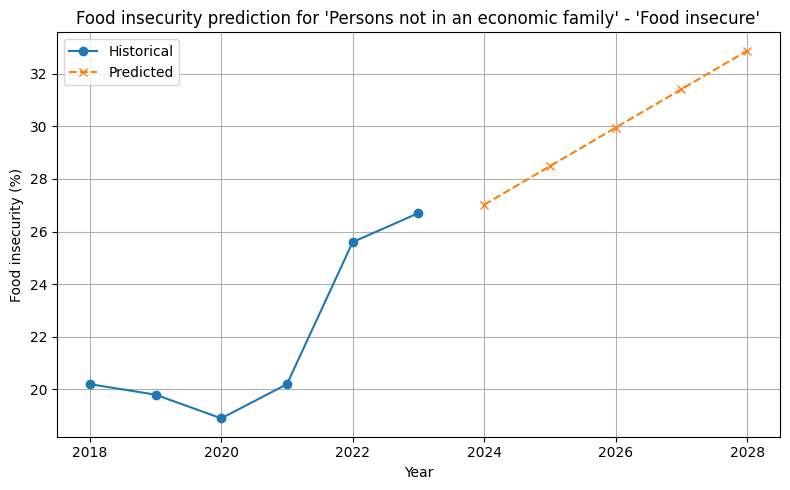

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


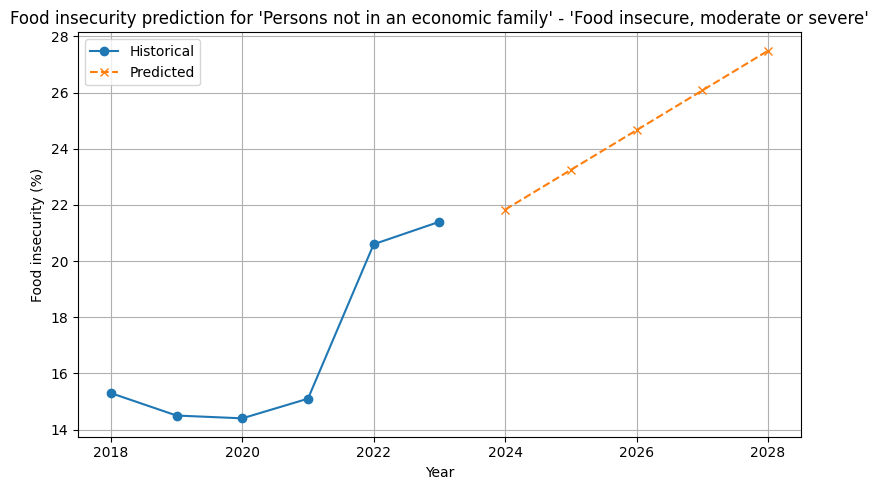

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


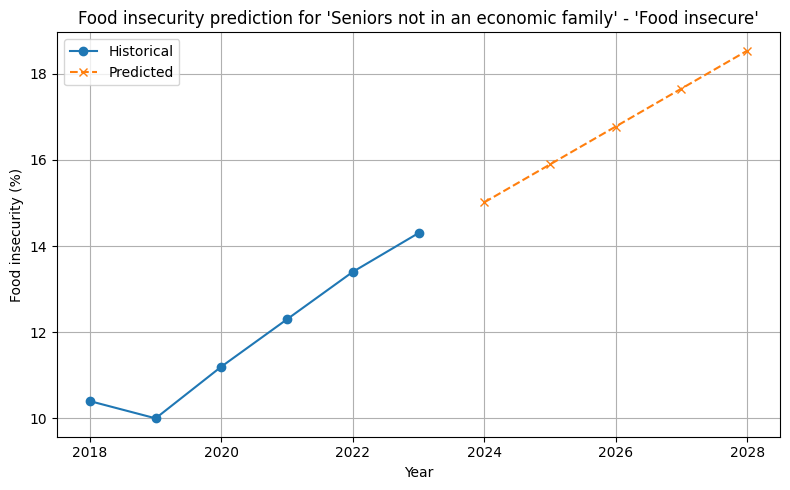

/opt/anaconda3/envs/ConcordIA/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


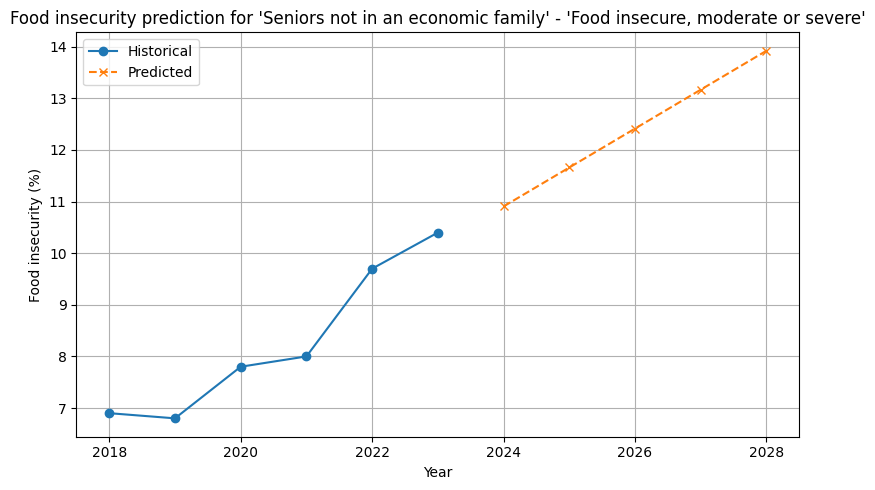

In [42]:
for (family_type, food_status), group in categories:
    # Skip if not enough data points
    if len(group['Year'].unique()) < 3:
        continue

    # Train model
    X = group[['Year']]
    y = group['Value']
    model = LinearRegression()
    model.fit(X, y)

    # Predict
    future_pred = model.predict(future_years)

    plt.figure(figsize=(8, 5))
    plt.plot(group['Year'], group['Value'], 'o-', label='Historical')
    plt.plot(future_years, future_pred, 'x--', label='Predicted')
    plt.title(f"Food insecurity prediction for '{family_type}' - '{food_status}'")
    plt.xlabel('Year')
    plt.ylabel('Food insecurity (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()